In [1]:
import alpha_vantage as av
import yfinance
import cryptocompare

NameError: name 'pd' is not defined

In [5]:
import pandas as pd
import mplfinance as mplf

In [35]:
from dataclasses import dataclass

@dataclass
class IntervalConversion:
    crypto_interval: str
    lookback_scale: int
    resample: bool


def yfinance_to_crypto_interval(interval: str) -> IntervalConversion:
    interval_dt = pd.Timedelta(interval)
    interval_dict = interval_dt.components._asdict()
    for k, v in interval_dict.items():
        if v != 0:
            crypto_interval = k
            lookback_scale = v
            break
    else:
        raise ValueError("Non non zero components.")

    return IntervalConversion(crypto_interval, lookback_scale, lookback_scale != 1)


In [63]:
pd.Timedelta('1d').value * 1e-9

86400.0

In [42]:
pd.Timedelta("5m") / pd.Timedelta("1m")

5.0

In [39]:
yfinance_to_crypto_interval("1")

ValueError: invalid unit abbreviation: week

In [34]:
test = pd.Timedelta("5m")
test.components.__dir__()

['__doc__',
 '__slots__',
 '_fields',
 '_field_defaults',
 '__new__',
 '_make',
 '_replace',
 '__repr__',
 '_asdict',
 '__getnewargs__',
 'days',
 'hours',
 'minutes',
 'seconds',
 'milliseconds',
 'microseconds',
 'nanoseconds',
 '__module__',
 '__hash__',
 '__getattribute__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__iter__',
 '__len__',
 '__getitem__',
 '__add__',
 '__mul__',
 '__rmul__',
 '__contains__',
 'index',
 'count',
 '__class_getitem__',
 '__str__',
 '__setattr__',
 '__delattr__',
 '__init__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

In [26]:
test.components.microseconds

0

In [103]:
from datetime import datetime
df = pd.DataFrame(cryptocompare.get_historical_price_minute("BTC", limit="150", toTs=datetime.now()))
df["time"] = pd.to_datetime(df["time"], unit="s")
df = df.set_index("time")
df.head()

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2021-10-07 23:18:00,46416.92,46372.72,46374.26,1.2630,58523.04,46416.92,direct,
2021-10-07 23:19:00,46361.37,46319.09,46355.53,28.6600,1327505.07,46319.09,invert_divide,ETH
2021-10-07 23:20:00,46412.86,46395.12,46402.33,1.2950,60073.88,46402.90,direct,
2021-10-07 23:21:00,46420.69,46402.23,46402.90,0.6845,31667.15,46416.28,direct,
2021-10-07 23:22:00,46339.43,46319.79,46339.53,12.0500,558388.33,46339.28,invert_divide,ETH


In [105]:
df.resample(pd.Timedelta('5m')).sum()

,high,low,open,volumefrom,volumeto,close
time,,,,,,
2021-10-07 23:15:00,92778.29,92691.81,92729.79,29.9230,1386028.11,92736.01
2021-10-07 23:20:00,232100.46,231985.45,232014.93,15.5392,720194.08,232082.34
2021-10-07 23:25:00,232192.87,232069.35,232172.45,4.3957,203900.51,232096.94
2021-10-07 23:30:00,231703.67,231364.09,231598.25,106.7081,4939720.17,231539.61
2021-10-07 23:35:00,231980.70,231758.82,231875.77,11.6540,540906.37,231850.70
2021-10-07 23:40:00,231598.53,231460.64,231521.64,4.9210,227956.72,231497.95
2021-10-07 23:45:00,231497.72,231375.15,231424.65,23.6447,1092855.98,231470.11
2021-10-07 23:50:00,231799.06,231671.67,231743.92,5.0961,235855.28,231731.59
2021-10-07 23:55:00,231463.05,231345.03,231412.70,29.7010,1373807.25,231422.05


In [101]:
df.resample('5m').agg({'open': 'first', 'high': 'max', 'low': 'min', 'close': 'last'})

,open,high,low,close
time,,,,
2021-10-31,46374.26,46848.28,46199.61,46691.44


In [97]:
df.resample("5m").agg({'open': 'first', 
                     'high': 'max', 
                     'low': 'min', 
                     'close': 'last'})

,open,high,low,close
time,,,,
2021-10-31,46266.27,46848.28,46199.61,46756.73


In [85]:
import numpy as np

In [106]:
# df = df.resample(pd.Timedelta("5m")).sum()
df_index = df.index
df = df.groupby(np.arange(len(df)) // 5).agg({'open': 'first', 
                     'high': 'max', 
                     'low': 'min', 
                     'close': 'last'})
df.index = df_index[::5]

In [107]:
df

,open,high,low,close
time,,,,
2021-10-07 23:18:00,46374.26,46420.69,46319.09,46339.28
2021-10-07 23:23:00,46418.26,46485.67,46402.32,46402.33
2021-10-07 23:28:00,46402.33,46406.73,46237.00,46324.42
2021-10-07 23:33:00,46324.42,46431.66,46207.37,46371.53
2021-10-07 23:38:00,46371.53,46374.85,46277.60,46288.33
2021-10-07 23:43:00,46288.33,46322.11,46199.61,46218.96
2021-10-07 23:48:00,46304.59,46378.25,46300.01,46340.24
2021-10-07 23:53:00,46340.24,46357.34,46215.39,46251.61
2021-10-07 23:58:00,46251.61,46406.62,46258.25,46333.08


In [3]:
API_KEY="IIT6Z12DW561T980"

In [19]:
pd.Timedelta("day")

ValueError: unit abbreviation w/o a number

In [26]:
from alpha_vantage.cryptocurrencies import CryptoCurrencies

In [27]:
cc = CryptoCurrencies(key=API_KEY, output_format="pandas")
cc.get_digital_currency_daily("BTC", "CNY")

(            1a. open (CNY)  1b. open (USD)  2a. high (CNY)  2b. high (USD)  \
 date                                                                         
 2021-10-07   356510.706500        55315.00   356622.271181        55332.31   
 2021-10-06   331742.122749        51471.99   359314.325000        55750.00   
 2021-10-05   317259.596343        49224.93   334412.392130        51886.30   
 2021-10-04   310653.884451        48200.01   319265.247012        49536.12   
 2021-10-03   307011.629539        47634.89   317279.898408        49228.08   
 ...                    ...             ...             ...             ...   
 2019-01-16    22899.827006         3553.06    23492.389500         3645.00   
 2019-01-15    23370.448208         3626.08    23514.431742         3648.42   
 2019-01-14    22413.221956         3477.56    23665.569337         3671.87   
 2019-01-13    23099.882910         3584.10    23273.900610         3611.10   
 2019-01-12    23210.803081         3601.31    23319

In [ ]:
# start = start.tz_localize("Europe/Paris")
# end = end.tz_localize("Europe/Paris")

In [23]:
pd.NaT

NaT

In [59]:
pd.Timedelta("1m").seconds

60

In [46]:
lookback = 24
interval = "1h"
end = pd.to_datetime("now")
start = end - pd.Timedelta(interval) * lookback

In [57]:
data = yfinance.download("AAPL", start=end-pd.Timedelta("2m"), end=end, interval="1m")
data.head()

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAPL: No data found for this date range, symbol may be delisted


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [ ]:
data.

In [41]:
len(data)

18

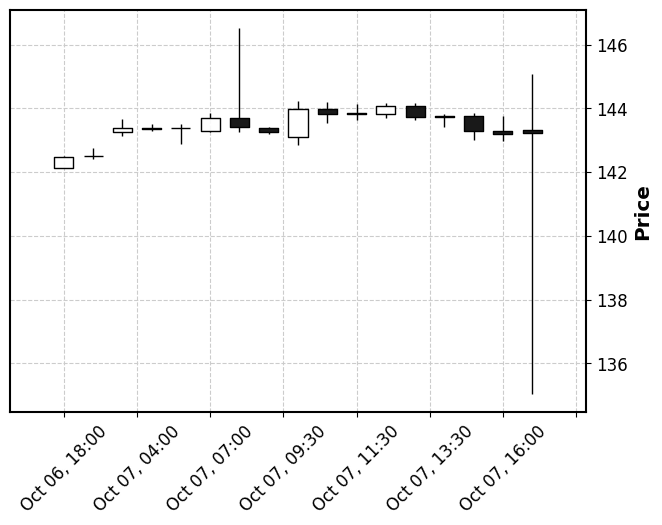

In [54]:
mplf.plot(data, type="candle", style="classic")